Wstęp do sztucznej inteligencji. Lista 4. Zadanie 2
Karol Janic. Czerwiec 2023. **Implementacja algorytmu DBSCAN** oraz jej testowanie przy rozpoznawaniu ręcznie pisanych cyfr.

In [ ]:
from keras.datasets import mnist
import tensorflow as tf

from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

import numpy as np


In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train = x_train.reshape(-1, 28 * 28) / 255.0
x_test = x_test.reshape(-1, 28 * 28)   / 255.0

x_combined = np.concatenate((x_train, x_test), axis=0)

tsne = TSNE(n_components=2)

x_combined_tsne = tsne.fit_transform(x_combined)

x_train_tsne = x_combined_tsne[:len(x_train)]
x_test_tsne = x_combined_tsne[len(x_train):]

Liczba klastrow:  11


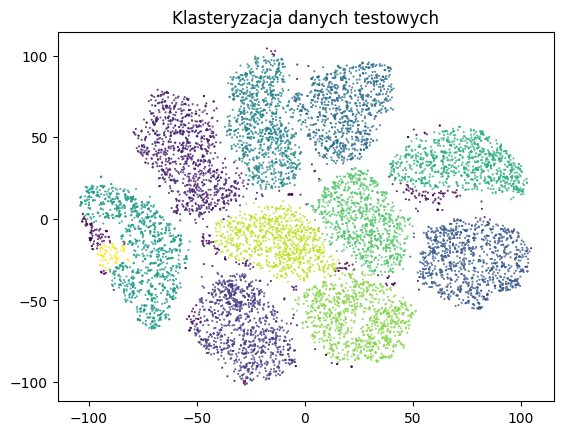

In [ ]:
from sklearn.cluster import DBSCAN

db1 = DBSCAN(eps=9, min_samples=100)
db1 = db1.fit(x_train_tsne)

labels_db = db1.labels_
clusters_db1 = db1.fit_predict(x_test_tsne)
n_clusters1_ = len(set(clusters_db1)) - (1 if -1 in clusters_db1 else 0)

print("Liczba klastrow: ", n_clusters1_)

plt.scatter(x_test_tsne[:,0], x_test_tsne[:,1], s=0.2, c=clusters_db1, cmap='viridis')
plt.title('Klasteryzacja danych testowych')
plt.show()

Implementacja DBSCAN

In [ ]:
def get_neighbors(dataset, point_index, eps):
    neighbors = []

    for sample_index in range(0, len(dataset)):
        if np.linalg.norm(dataset[point_index] - dataset[sample_index]) < eps:
           neighbors.append(sample_index)

    return neighbors

In [ ]:
def extend_cluster(dataset, labels, point, neighbors, claster_index, eps, min_points_number):
    labels[point] = claster_index

    i = 0
    while i < len(neighbors):
        neighbor = neighbors[i]

        if labels[neighbor] == -1:
           labels[neighbor] = claster_index
        elif labels[neighbor] == 0:
            labels[neighbor] = claster_index
            neighbors_of_p = get_neighbors(dataset, neighbor, eps)

            if len(neighbors_of_p) >= min_points_number:
                neighbors = neighbors + neighbors_of_p

        i += 1

In [ ]:
def dbscan(dataset, eps, min_points_number):
    labels = [0] * len(dataset)

    C = 0
    for point_index in range(0, len(dataset)):
        if not (labels[point_index] == 0):
           continue

        neighbors = get_neighbors(dataset, point_index, eps)

        if len(neighbors) < min_points_number:
            labels[point_index] = -1
        else:
           C += 1
           extend_cluster(dataset, labels, point_index, neighbors, C, eps, min_points_number)

    return labels

In [ ]:
res_labels = dbscan(x_test_tsne, 9, 100)

In [ ]:
set_labels = {0: [], 1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: [], 8: [], 9: []}
failures = {0: [], 1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: [], 8: [], 9: []}
failures_counter = 0
for target_label, predicted_label in zip(y_test, res_labels):
    set_labels[target_label].append(predicted_label)

for k in range(10):
    most_frequent = max(set(set_labels[k]), key = set_labels[k].count)
    wrong_labels = [label for label in set_labels[k] if label != most_frequent]
    failures_counter += len(wrong_labels)
    failures[k].append(wrong_labels)

    acc = (len(set_labels[k]) - len(wrong_labels)) / len(set_labels[k]) * 100.0
    noise = sum([1 if label == -1 else 0 for label in set_labels[k]]) / len(set_labels[k]) * 100.0
    wrong_labeled = 100.0 - acc - noise

    print(f'Digit {k}: accuracy: {acc:.2f}%     noise: {noise:.2f}%     wrong labeled: {wrong_labeled:.2f}%')

print(f'Accuracy {(len(y_test) - failures_counter) / len(y_test) * 100.0} %')

Digit 0: accuracy: 98.98%     noise: 0.31%     wrong labeled: 0.71%
Digit 1: accuracy: 86.17%     noise: 7.14%     wrong labeled: 6.70%
Digit 2: accuracy: 92.64%     noise: 4.17%     wrong labeled: 3.20%
Digit 3: accuracy: 94.46%     noise: 2.18%     wrong labeled: 3.37%
Digit 4: accuracy: 94.40%     noise: 1.02%     wrong labeled: 4.58%
Digit 5: accuracy: 96.52%     noise: 1.46%     wrong labeled: 2.02%
Digit 6: accuracy: 91.75%     noise: 6.78%     wrong labeled: 1.46%
Digit 7: accuracy: 94.46%     noise: 1.46%     wrong labeled: 4.09%
Digit 8: accuracy: 87.58%     noise: 7.19%     wrong labeled: 5.24%
Digit 9: accuracy: 93.66%     noise: 3.07%     wrong labeled: 3.27%
Accuracy 92.94 %


Zmniejszenie wielowymiarowości

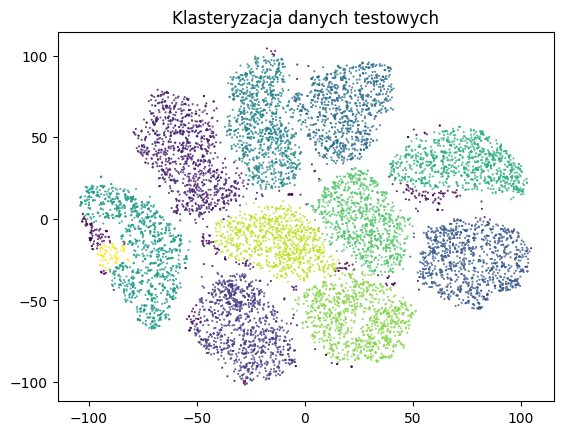

Accuracy 92.94 %

Digit 0: accuracy: 98.98%     noise: 0.31%     wrong labeled: 0.71%

Digit 1: accuracy: 86.17%     noise: 7.14%     wrong labeled: 6.70%

Digit 2: accuracy: 92.64%     noise: 4.17%     wrong labeled: 3.20%

Digit 3: accuracy: 94.46%     noise: 2.18%     wrong labeled: 3.37%

Digit 4: accuracy: 94.40%     noise: 1.02%     wrong labeled: 4.58%

Digit 5: accuracy: 96.52%     noise: 1.46%     wrong labeled: 2.02%

Digit 6: accuracy: 91.75%     noise: 6.78%     wrong labeled: 1.46%

Digit 7: accuracy: 94.46%     noise: 1.46%     wrong labeled: 4.09%

Digit 8: accuracy: 87.58%     noise: 7.19%     wrong labeled: 5.24%

Digit 9: accuracy: 93.66%     noise: 3.07%     wrong labeled: 3.27%

